**1. Importing Necessary Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**2. Loading the CSV Files**

In [3]:
# Load the CSV files
file1 = pd.read_csv('/content/drive/MyDrive/callsf0d4f5a.csv')
file2 = pd.read_csv('/content/drive/MyDrive/customers2afd6ea.csv')
file3 = pd.read_csv('/content/drive/MyDrive/reason18315ff.csv')
file4 = pd.read_csv('/content/drive/MyDrive/sentiment_statisticscc1e57a.csv')


**3. Displaying Data Shapes and Initial Rows**

In [4]:
# Display the shape of file1
print("Shape of file1:", file1.shape)

# Display the first few rows of each file
print("File 1 Head:")
print(file1.head())
print("File 2 Head:")
print(file2.head())
print("File 3 Head:")
print(file3.head())
print("File 4 Head:")
print(file4.head())


Shape of file1: (71810, 7)
File 1 Head:
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling Unite

**4. Checking for Duplicate Values in file1**

In [5]:
# Check for duplicate values in file1 and print them
duplicate_values_file1 = file1[file1['call_id'].duplicated()]
print("Duplicate values in file1:")
print(duplicate_values_file1)


Duplicate values in file1:
Empty DataFrame
Columns: [call_id, customer_id, agent_id, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript]
Index: []


**5. Checking for Null Values in file2**

In [6]:
# Check for null values in file2
print("Null values in file2:")
print(file2.isnull().sum())


Null values in file2:
customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64


**6. Checking for Duplicate Values in file2**

In [7]:
# Check for duplicate values in file2 and print them
duplicate_values_file2 = file2[file2['customer_name'].duplicated()]
print("Duplicate values in file2:")
print(duplicate_values_file2)


Duplicate values in file2:
       customer_id       customer_name  elite_level_code
124     9970923895      Matthew Foster               2.0
1055    5618384809        William King               0.0
1091    1889571785         John Brooks               NaN
1143    1133553416     Margaret Austin               3.0
1156    9078586833         Evan Wilson               1.0
...            ...                 ...               ...
71799   3216879005  Christopher Nelson               NaN
71801   2645089989       Charles Smith               NaN
71803   6137149578        Michelle Ray               0.0
71806   4474867021       Paul Mitchell               1.0
71808   8095620266     Christine Oneal               1.0

[17296 rows x 3 columns]


**7. Checking Unique Values in agent_tone Column of file4**

In [8]:
# Check unique values in agent_tone column of file4
print("Unique agent_tone values in file4:")
print(file4['agent_tone'].unique())


Unique agent_tone values in file4:
['neutral' 'calm' 'frustrated' 'angry' nan 'polite']


**8. Checking for Null Values in file4**

In [9]:
# Check for null values in file4
print("Null values in file4:")
print(file4.isnull().sum())


Null values in file4:
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


**9. Filling NaN Values in agent_tone**

In [10]:
# Fill NaN values in agent_tone with "neutral"
file4['agent_tone'] = file4['agent_tone'].fillna("neutral")


**10. Merging the DataFrames**

In [11]:
# Merge the dataframes
result = file1.merge(file2, on='customer_id').merge(file3, on='call_id').merge(file4, on=['call_id', 'agent_id'])

# Display the final merged DataFrame
print("Merged result:")
print(result)


Merged result:
          call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118     7/31/2024 23:56   
1      1122072124   8186702651    519057       8/1/2024 0:03   
2      6834291559   2416856629    158319     7/31/2024 23:59   
3      2266439882   1154544516    488324       8/1/2024 0:05   
4      1211603231   5214456437    721730       8/1/2024 0:04   
...           ...          ...       ...                 ...   
66648  7569738090   7367304988    783441     8/31/2024 23:51   
66649  1563273072   8022667294    413148     8/31/2024 23:48   
66650  8865997781   4474867021    980156     8/31/2024 23:55   
66651  8019240181   9762042472    616988     8/31/2024 23:52   
66652  8210720833   8014388758    547592     8/31/2024 23:49   

      agent_assigned_datetime call_end_datetime  \
0               8/1/2024 0:03     8/1/2024 0:34   
1               8/1/2024 0:06     8/1/2024 0:18   
2               8/1/2024 0:07     8/1/2024 0:26   
3           

**11. Saving the Merged DataFrame**

In [12]:
# Optionally, save the result to a new CSV file
result.to_csv('/content/drive/MyDrive/merged.csv', index=False)


**12. Displaying Unique Agents Count**

In [13]:
# Display the number of unique agents in the result
print("Unique agent_id count:", result['agent_id'].nunique())


Unique agent_id count: 383


**13. Reading the Saved Merged Result**

In [15]:
# Read the saved merged result
final = pd.read_csv('/content/drive/MyDrive/merged.csv')

# Check for null values in the final dataframe
print("Null values in final:")
print(final.isnull().sum())



Null values in final:
call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           23959
primary_call_reason            0
agent_tone                     0
customer_tone                  0
average_sentiment            101
silence_percent_average        0
dtype: int64


**14. Counting Unique Primary Call Reasons**

In [16]:
# Calculate distinct values in primary_call_reason
freque = final['primary_call_reason'].nunique()
print("Number of unique primary_call_reason:", freque)


Number of unique primary_call_reason: 54


**15. Filling NaN Values in Average Sentiment and Elite Level Code**

In [17]:
# Fill NaN values in average_sentiment and elite_level_code
final['average_sentiment'] = final['average_sentiment'].fillna(0)
final['elite_level_code'] = final['elite_level_code'].fillna(-1)


**16. Converting Datetime Columns**

In [18]:
# Convert the datetime columns to datetime format
final['call_start_datetime'] = pd.to_datetime(final['call_start_datetime'])
final['call_end_datetime'] = pd.to_datetime(final['call_end_datetime'])
final['agent_assigned_datetime'] = pd.to_datetime(final['agent_assigned_datetime'])


**17. Calculating Total Handle Time**

In [19]:
# Calculate Total Handle Time
final['handle_time'] = (final['call_end_datetime'] - final['call_start_datetime']).dt.total_seconds()


**18. Calculating Total Waiting Time**

In [20]:
# Calculate Total Waiting Time
final['waiting_time'] = (final['agent_assigned_datetime'] - final['call_start_datetime']).dt.total_seconds()


**19. Calculating AHT and AST by agent_id**

In [21]:
# Calculate AHT (Average Handle Time) and AST (Average Waiting Time) by agent_id
aht_ast_by_agent = final.groupby('agent_id').agg({
    'handle_time': 'mean',  # Average handle time for each agent
    'waiting_time': 'mean'  # Average waiting time for each agent
}).reset_index()

# Rename the columns for clarity
aht_ast_by_agent.columns = ['agent_id', 'avg_handle_time', 'avg_waiting_time']

# Optionally, convert times to integers (in seconds)
aht_ast_by_agent['avg_handle_time'] = aht_ast_by_agent['avg_handle_time'].astype(int)
aht_ast_by_agent['avg_waiting_time'] = aht_ast_by_agent['avg_waiting_time'].astype(int)

# Display the AHT and AST for each agent
print("Average Handle Time and Average Waiting Time by Agent:")
print(aht_ast_by_agent)


Average Handle Time and Average Waiting Time by Agent:
     agent_id  avg_handle_time  avg_waiting_time
0      102574             4080               480
1      103651             1163               419
2      106000             1164               441
3      107876             1460               470
4      112609             1447               435
..        ...              ...               ...
378    981776             1132               427
379    981779             1137               439
380    982131             1173               439
381    992521             1437               453
382    993862             1116               440

[383 rows x 3 columns]


**20. Saving the Final DataFrame**


In [22]:
# Save the final dataframe to a new CSV file
final.to_csv('/content/drive/MyDrive/final_copy.csv', index=False)


**21. Analyzing Call Reasons**

In [23]:
# Analyze call reasons
freque = final['primary_call_reason'].value_counts()
print("Call reason frequencies:")
print(freque)


Call reason frequencies:
primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      14

**22. Cleaning the primary_call_reason Column**

In [24]:
# Clean the primary_call_reason column
df = final.copy()  # Create a copy of final for further analysis
df['primary_call_reason'] = df['primary_call_reason'].str.replace(' +', ' ', regex=True).str.strip()


**23. Printing Distinct primary_call_reason Values**

In [25]:
# Print distinct primary_call_reason values
distinct_reasons = df['primary_call_reason'].unique()
print("Distinct primary_call_reason values:")
print(distinct_reasons)


Distinct primary_call_reason values:
['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post Flight' 'Check In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products & Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC' 'Post-Flight' 'Check-In' 'Products and Services']


**24. Standardizing Similar Categories**

In [26]:
# Standardize similar categories
mapping = {
    'Post Flight': 'Post-Flight',
    'Post-Flight': 'Post-Flight',
    'Products & Services': 'Products and Services',
    'Check In': 'Check-In',
    'Check-In': 'Check-In'
}
df['primary_call_reason'] = df['primary_call_reason'].replace(mapping)


**25. Grouping by agent_id for Performance Analysis**

In [27]:
# Group by agent_id to analyze agent performance
agent_performance = df.groupby('agent_id').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'average_sentiment': 'mean'
}).reset_index()


**26. Grouping by primary_call_reason for Call Types Analysis**

In [28]:
# Group by primary_call_reason to analyze call types
call_reason_performance = df.groupby('primary_call_reason').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'average_sentiment': 'mean',
    'silence_percent_average': 'mean'
}).reset_index().sort_values(by='handle_time', ascending=False)


**27. Analyzing Sentiment Impact on AHT and AST**

In [29]:
# Analyze sentiment impact on AHT and AST
sentiment_performance = df.groupby('average_sentiment').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean'
}).reset_index()


**28. Analyzing Customer and Agent Tone Impact**

In [30]:
# Analyze the effect of customer tone and agent tone
tone_performance = df.groupby(['customer_tone', 'agent_tone']).agg({
    'handle_time': 'mean',
    'waiting_time': 'mean'
}).reset_index()


**29. Counting Occurrences of Each primary_call_reason**

In [31]:
# Count occurrences of each primary_call_reason
call_reason_counts = df['primary_call_reason'].value_counts()

# Identify most frequent and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()


**30. Calculating Averages and Displaying Results**

In [32]:
# Calculate the averages of the different metrics
average_metrics = df[['handle_time', 'waiting_time', 'average_sentiment']].mean()

print("Average Metrics:")
print(average_metrics)


Average Metrics:
handle_time          1134.148801
waiting_time          436.972079
average_sentiment      -0.033577
dtype: float64


**31. Final Review**

In [33]:
# Review the final dataframe and ensure everything looks correct
print("Final Dataframe Overview:")
print(final.describe())


Final Dataframe Overview:
            call_id   customer_id       agent_id  \
count  6.665300e+04  6.665300e+04   66653.000000   
mean   4.993883e+09  5.006607e+09  564623.782936   
min    1.316420e+05  4.430700e+05  102574.000000   
25%    2.481353e+09  2.514373e+09  347606.000000   
50%    4.987649e+09  5.006072e+09  591778.000000   
75%    7.495496e+09  7.509114e+09  786323.000000   
max    9.999806e+09  9.999935e+09  993862.000000   
std    2.889665e+09  2.883582e+09  257493.355821   

                 call_start_datetime        agent_assigned_datetime  \
count                          66653                          66653   
mean   2024-08-16 11:00:46.465725440  2024-08-16 11:08:03.437804800   
min              2024-07-31 23:56:00            2024-08-01 00:03:00   
25%              2024-08-09 11:25:00            2024-08-09 11:32:00   
50%              2024-08-17 09:12:00            2024-08-17 09:19:00   
75%              2024-08-24 14:22:00            2024-08-24 14:29:00   
max     

**32. Saving the Final DataFrame Again**

In [34]:
# Save the final dataframe again to ensure the latest updates are captured
final.to_csv('/content/drive/MyDrive/final_copy_v2.csv', index=False)


**33. Viewing the dataframe**

In [35]:
df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,2280.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,-1.0,Booking,calm,neutral,0.02,0.35,900.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,-1.0,IRROPS,neutral,polite,-0.13,0.32,1620.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,720.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,1140.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,Kevin Warner,2.0,Mileage Plus,neutral,frustrated,-0.19,0.51,960.0,360.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,-1.0,Post-Flight,calm,calm,0.05,0.34,2220.0,540.0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,Upgrade,calm,frustrated,0.03,0.22,660.0,180.0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,-1.0,Upgrade,calm,polite,0.05,0.42,720.0,360.0


**34. Viewing the agent performance**

In [36]:
agent_performance

,agent_id,handle_time,waiting_time,average_sentiment
0,102574,4080.000000,480.000000,-0.075000
1,103651,1163.745583,419.575972,-0.025194
2,106000,1164.356436,441.980198,-0.029901
3,107876,1460.000000,470.000000,-0.065000
4,112609,1447.500000,435.000000,-0.023750
...,...,...,...,...
378,981776,1132.928571,427.071429,-0.030393
379,981779,1137.746479,439.718310,-0.036948
380,982131,1173.571429,439.285714,-0.035635
381,992521,1437.209302,453.488372,-0.003023


**35. Viewing the call reason performance**

In [37]:
call_reason_performance

,primary_call_reason,handle_time,waiting_time,average_sentiment,silence_percent_average
3,Checkout,1741.557203,724.703390,-0.068957,0.292309
7,ETC,1507.184874,544.285714,-0.049275,0.287563
11,Post-Flight,1502.327945,569.431871,-0.063767,0.297804
9,Mileage Plus,1356.588617,361.015211,-0.027370,0.275038
18,Voluntary Cancel,1261.381456,539.514624,-0.031512,0.281767
16,Unaccompanied Minor,1207.500000,688.269231,-0.013846,0.242500
19,Voluntary Change,1179.640487,540.486726,-0.003821,0.289599
8,IRROPS,1145.197205,360.081136,-0.073959,0.309404
15,Traveler Updates,1083.265742,690.032017,0.006692,0.284717
4,Communications,1066.687500,239.968750,-0.036383,0.303578


**36. Viewing the sentiment performance**

In [38]:
sentiment_performance

,average_sentiment,handle_time,waiting_time
0,-1.38,540.0,480.0
1,-1.25,540.0,540.0
2,-1.22,360.0,240.0
3,-1.19,660.0,600.0
4,-1.17,240.0,240.0
...,...,...,...
175,0.93,660.0,600.0
176,0.96,1200.0,480.0
177,1.00,456.0,408.0
178,1.38,540.0,300.0


**37. Viewing the tone performance**

In [39]:
tone_performance

,customer_tone,agent_tone,handle_time,waiting_time
0,angry,angry,939.166667,439.166667
1,angry,calm,1060.022051,444.674752
2,angry,frustrated,1044.585799,423.106509
3,angry,neutral,1180.596125,433.599106
4,angry,polite,813.750000,446.250000
5,calm,angry,801.904762,436.190476
6,calm,calm,1078.995870,441.504021
7,calm,frustrated,1040.598425,420.755906
8,calm,neutral,1185.090407,435.964340
9,calm,polite,676.000000,536.000000


**38. Viewing the primary call reson, average handle time, average waiting time, call count**

In [40]:
# Group by primary call reason to calculate average handle time and waiting time
call_reason_perf = df.groupby('primary_call_reason').agg(
    average_handle_time=('handle_time', 'mean'),
    average_waiting_time=('waiting_time', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Sort by the highest AHT for analysis
call_reason_perf.sort_values('average_handle_time', ascending=False, inplace=True)

# Display the top 10 most time-consuming call reasons
print(call_reason_perf.head(10))

    primary_call_reason  average_handle_time  average_waiting_time  call_count
3              Checkout          1741.557203            724.703390        1888
7                   ETC          1507.184874            544.285714         952
11          Post-Flight          1502.327945            569.431871        4330
9          Mileage Plus          1356.588617            361.015211        5851
18     Voluntary Cancel          1261.381456            539.514624        1607
16  Unaccompanied Minor          1207.500000            688.269231         104
19     Voluntary Change          1179.640487            540.486726       10848
8                IRROPS          1145.197205            360.081136       13311
15     Traveler Updates          1083.265742            690.032017         937
4        Communications          1066.687500            239.968750        3840


**39. Percentage differencein in AHT between most and least frequent call reasons**

In [41]:
# Get the most frequent and least frequent call reasons
most_frequent_reason = call_reason_perf.iloc[0]['primary_call_reason']
least_frequent_reason = call_reason_perf.iloc[-1]['primary_call_reason']

# Calculate percentage difference in AHT
most_frequent_aht = call_reason_perf.iloc[0]['average_handle_time']
least_frequent_aht = call_reason_perf.iloc[-1]['average_handle_time']

diff_percentage = (most_frequent_aht - least_frequent_aht) / least_frequent_aht * 100
print(f"Percentage difference in AHT between most and least frequent call reasons: {diff_percentage:.2f}%")


Percentage difference in AHT between most and least frequent call reasons: 195.76%


**40. Least and Most frequent calls**

In [42]:
# Step 1: Count occurrences of each primary_call_reason
call_reason_counts = df['primary_call_reason'].value_counts()

# Step 2: Identify most frequent and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

# Step 3: Calculate the average AHT for the most and least frequent reasons
aht_most_frequent = df[df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = df[df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

# Step 4: Calculate the percentage difference
if aht_least_frequent != 0:  # To avoid division by zero
    percentage_diff_aht = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100
else:
    percentage_diff_aht = float('inf')  # Handle case where AHT for least frequent is zero

# Display the results
print(f"Most frequent call reason: {most_frequent_reason} (AHT: {aht_most_frequent:.2f} seconds)")
print(f"Least frequent call reason: {least_frequent_reason} (AHT: {aht_least_frequent:.2f} seconds)")
print(f"Percentage difference in AHT: {percentage_diff_aht:.2f}%")

Most frequent call reason: IRROPS (AHT: 1145.20 seconds)
Least frequent call reason: Unaccompanied Minor (AHT: 1207.50 seconds)
Percentage difference in AHT: -5.16%


**41. Calculate AHT by Agent**

In [44]:
# Calculate average handle time by agent
aht_by_agent = final.groupby('agent_id')['handle_time'].mean().reset_index()

# Rename columns for clarity
aht_by_agent.columns = ['agent_id', 'average_handle_time']


**42. Plotting Agent Performance (Average Handle Time by Agent)**

<ipython-input-45-74b894926ac1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='agent_id', y='average_handle_time', data=aht_by_agent, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

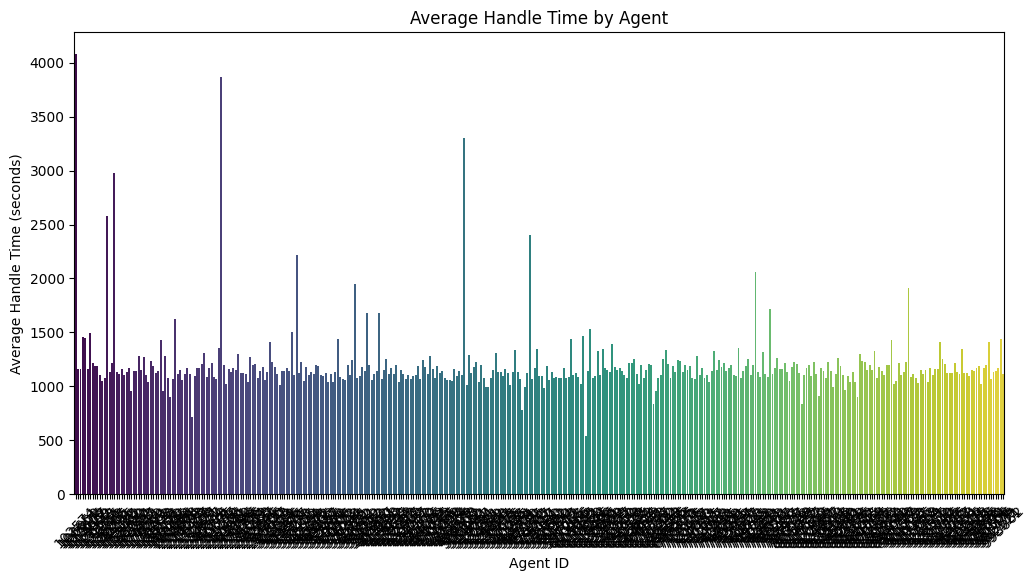

In [45]:
# Plot AHT by Agent
plt.figure(figsize=(12, 6))
sns.barplot(x='agent_id', y='average_handle_time', data=aht_by_agent, palette='viridis')
plt.title('Average Handle Time by Agent')
plt.xlabel('Agent ID')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=45)
plt.show()


**43. Plotting Call Reason Performance (Average Handle Time by Call Reason)**

<ipython-input-49-ccaa6b30ba9f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_handle_time', y='primary_call_reason', data=call_reason_perf.sort_values(by='average_handle_time', ascending=False), palette='crest')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/

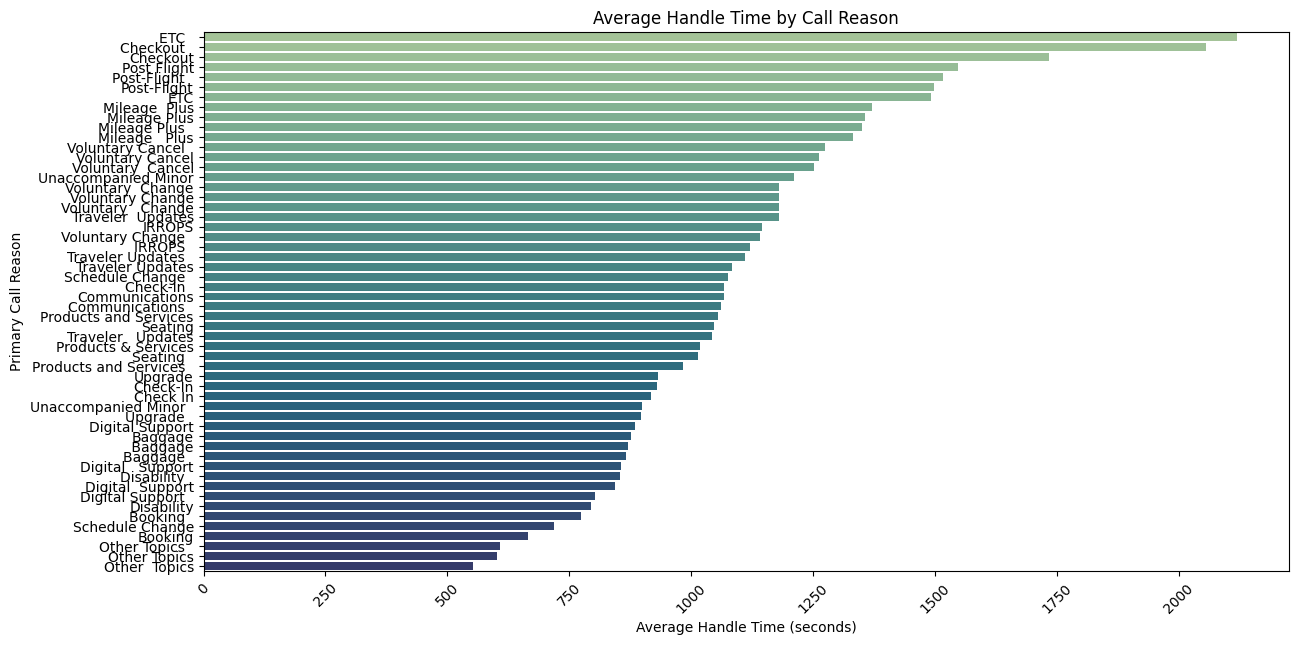

In [49]:
# Calculate average handle time by primary call reason
call_reason_perf = final.groupby('primary_call_reason')['handle_time'].mean().reset_index()

# Rename columns for clarity
call_reason_perf.columns = ['primary_call_reason', 'average_handle_time']

# Plot Average Handle Time by Call Reason
plt.figure(figsize=(14, 7))
sns.barplot(x='average_handle_time', y='primary_call_reason', data=call_reason_perf.sort_values(by='average_handle_time', ascending=False), palette='crest')
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')
plt.xticks(rotation=45)
plt.show()


**44. Plotting Sentiment Impact on Handle Time**

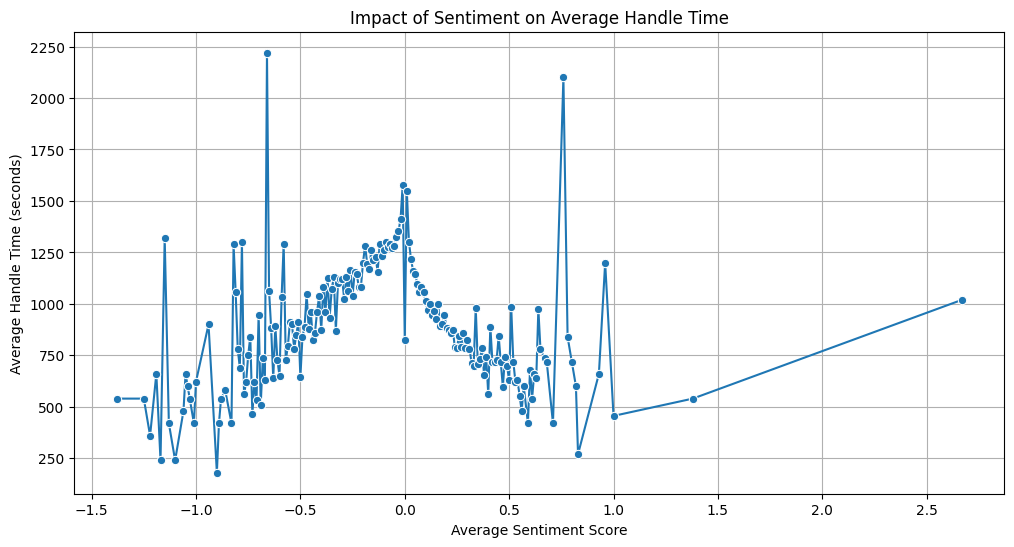

In [50]:
# Calculate the average handle time by sentiment score
sentiment_performance = final.groupby('average_sentiment')['handle_time'].mean().reset_index()

# Rename columns for clarity
sentiment_performance.columns = ['average_sentiment', 'average_handle_time']
# Plot Sentiment Impact on Handle Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='average_sentiment', y='average_handle_time', data=sentiment_performance, marker='o')
plt.title('Impact of Sentiment on Average Handle Time')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Handle Time (seconds)')
plt.grid(True)
plt.show()


**45. Tone Analysis (Heatmap of Handle Time by Customer and Agent Tone)**

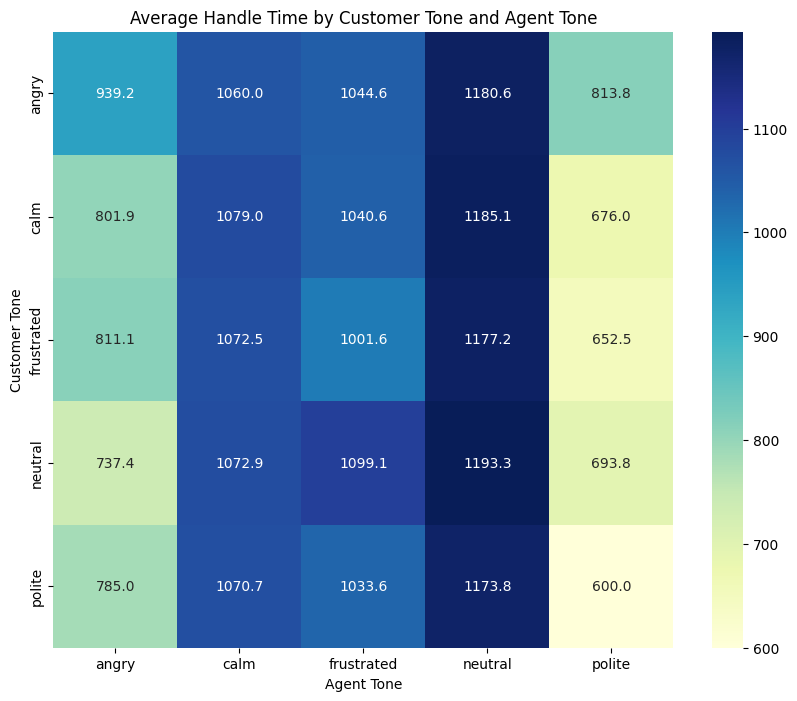

In [51]:
# Calculate the average handle time by customer and agent tone
tone_heatmap_data = final.pivot_table(values='handle_time', index='customer_tone', columns='agent_tone', aggfunc='mean').fillna(0)
# Plot Heatmap for Tone Performance
plt.figure(figsize=(10, 8))
sns.heatmap(tone_heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Handle Time by Customer Tone and Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Customer Tone')
plt.show()
